In [49]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import numpy as np
from sklearn.model_selection import cross_val_score

In [9]:
train_data = pd.read_csv('train_iris.csv')
X_train = train_data.drop(['species', 'Unnamed: 0'], axis=1)
y_train = train_data.species
assert(len(X_train)==len(y_train))

In [3]:
test_data = pd.read_csv('test_iris.csv')
X_test = test_data.drop(['species', 'Unnamed: 0'], axis=1)
y_test = test_data.species
assert(len(X_test)==len(y_test))

In [50]:
train_score = []
accuracy_score = []
mean_cv_score = []
depthes = []
depthes.extend(range(1, 101))
np.random.seed(0)

In [51]:
for i in depthes:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    cv_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    mean_cv_score.append(cross_val_score(cv_clf, X_train, y_train, cv=5).mean())
    train_score.append(clf.score(X_train, y_train))
    accuracy_score.append(clf.score(X_test, y_test))

In [52]:
# pd.DataFrame(columns=["train_score", "test_score"], data=[train_score, accuracy_score])
score_df = pd.DataFrame({"max_depth" : depthes, "train_score": train_score, "mean_cv_score": mean_cv_score, "test_score": accuracy_score})

<AxesSubplot:xlabel='max_depth', ylabel='score'>

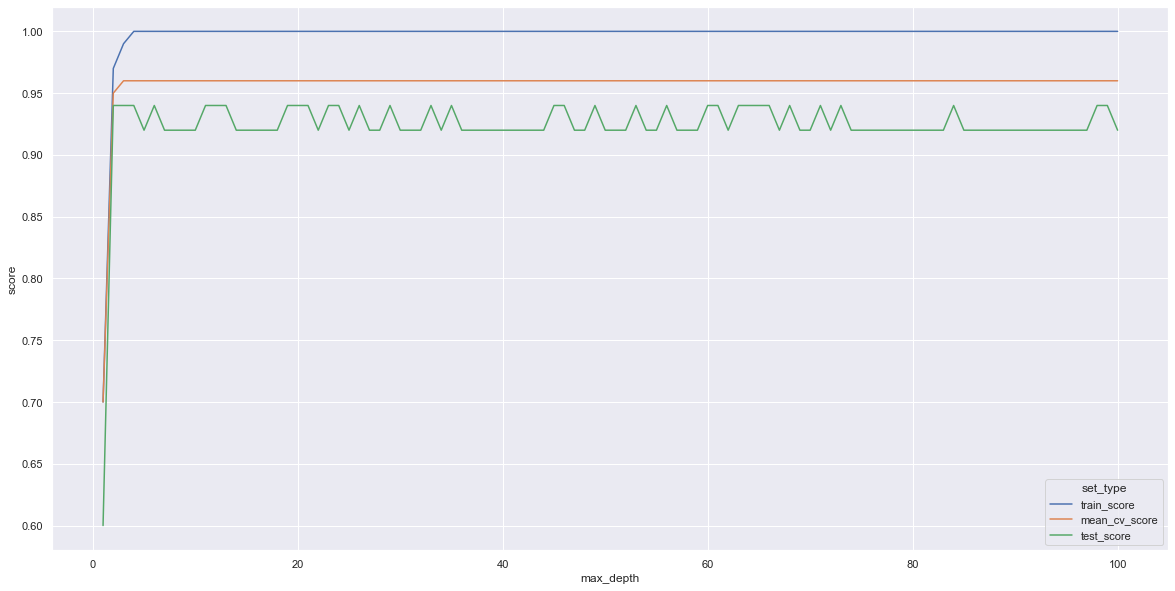

In [53]:
# Видоизменим DataFrame, применив метод melt()
scores_iris_data_long = pd.melt(score_df, id_vars=['max_depth'],
                           value_vars=['train_score',"mean_cv_score", 'test_score'],
                           var_name='set_type', value_name='score')

# Визуализация
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_iris_data_long)

Опробуем дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Даны 2 numpy array с измеренными признаками ирисов и их принадлежностью к виду. 

In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import re

iris = load_iris()
fns = [re.sub('\W+','_', fn )[:-1] for fn in iris.feature_names ]
X = pd.DataFrame(iris.data, columns=fns)
y = pd.DataFrame(iris.target, columns=["species"])

In [119]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используем функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных в пропорции 75% и 25% соответственно.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75)

Создадим дерево dt с параметрами по умолчанию и обучим его на тренировочных данных, а после предскажем классы, к которым принадлежат данные из тестовой выборки, сохранив результат предсказаний в переменную predicted.

In [95]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
predicted = dt.predict(X_test)
dt.score(X_test, y_test)


0.9210526315789473

Осуществим перебор всех деревьев на данных по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10

[Text(125.55000000000001, 190.26, 'petal_length_cm <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(167.4, 135.9, 'petal_width_cm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(83.7, 81.53999999999999, 'petal_length_cm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(251.10000000000002, 81.53999999999999, 'petal_length_cm <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclas

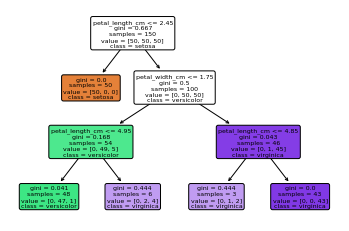

In [120]:
from symbol import parameters
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
search = GridSearchCV(dt, param_grid={"max_depth": range(1,10), "min_samples_split" : range(2,10), "min_samples_leaf" : range(1,10)})
search.fit(X,y)
best_tree=search.best_estimator_

In [ ]:
tree.plot_tree(best_tree, feature_names=fns, class_names=list(iris.target_names), filled=True, rounded=True) 

Пробегаясь по рандомной подвыборке параметров, RandomizedSearchCV ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

In [121]:
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()
search = RandomizedSearchCV(dt,param_distributions={"max_depth": range(1,10), "min_samples_split" : range(2,10), "min_samples_leaf" : range(1,10)})
search.fit(X,y)
best_tree=search.best_estimator_

[Text(148.8, 195.696, 'petal_length_cm <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(186.0, 152.208, 'petal_width_cm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(111.60000000000001, 108.72, 'petal_length_cm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(74.4, 65.232, 'sepal_length_cm <= 5.05\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(37.2, 21.744, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]\nclass = versicolor'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = versicolor'),
 Text(148.8, 65.232, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(260.40000000000003, 108.72, 'petal_length_cm <= 4.95\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(223.

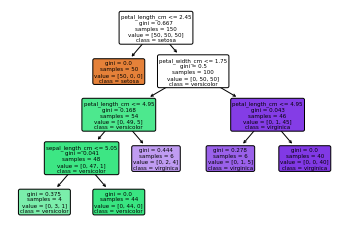

In [122]:
tree.plot_tree(best_tree, feature_names=fns, class_names=list(iris.target_names), filled=True, rounded=True) 

N

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred=best_tree.predict(X_test))


array([[16,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]])